In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from pymystem3 import Mystem
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import dataframe_process as my_module
import spacy
nlp = spacy.load("ru_core_news_md")
stopwords_ru = list(nlp.Defaults.stop_words)

In [6]:
data = pd.read_csv("data.csv", )
data

,Название,Тип рецензии,Текст рецензии,Количество слов
0,Тьма,bad,вчера наконец досматривать тьма сразу сказать ...,667
1,Тьма,bad,я писать данный ревивать исключительно потому ...,625
2,Тьма,bad,не быть описывать содержание нет смысл сразу к...,527
3,Тьма,bad,никогда такой не быть и вот опятьпоминаться в ...,337
4,Тьма,bad,о данный сериал я услышать совсем недавно и у ...,817
...,...,...,...,...
1995,1+1,good,начинать с тот что фильм у мы в страна показыв...,306
1996,1+1,good,легкость казаться бы она не мочь быть ни у чел...,307
1997,1+1,good,без всякий предисловие сразу сказать что это х...,349
1998,1+1,good,большинство французский фильм всегда наполнять...,338


In [38]:
data = my_module.create_dataframe("c:\\Users\\Acer\\Documents\\py_lab_2\\annotations_3.csv")
data

,Тип рецензии,Текст рецензии,Количество слов
Тьма,bad,"Вчера, наконец, досмотрела «Тьму». Сразу скажу...",667
Тьма,bad,"Я пишу данное ревью исключительно потому, что ...",625
Тьма,bad,"Не буду описывать содержание, нет смысла. Сраз...",527
Тьма,bad,"Никогда такого не было, и вот опять...\n\n\n\n...",337
Тьма,bad,"О данном сериале я услышал совсем недавно, и у...",817
...,...,...,...
1+1,good,"Начну с того, что фильм у нас в стране показал...",306
1+1,good,"Легкость. Казалось бы, её не может быть ни у ч...",307
1+1,good,"Без всяких предисловий сразу скажу, что это хо...",349
1+1,good,Большинство французский фильмов всегда наполне...,338


In [39]:
m = Mystem()
data["Текст рецензии"] = data["Текст рецензии"].apply(my_module.del_trash)
data["Текст рецензии"] = data["Текст рецензии"].apply(m.lemmatize)
data["Текст рецензии"] = data["Текст рецензии"].apply("".join)
data["Текст рецензии"] = data["Текст рецензии"].apply(my_module.del_trash)
data["Текст рецензии"]

Тьма    вчера наконец досматривать тьма сразу сказать ...
Тьма    я писать данный ревивать исключительно потому ...
Тьма    не быть описывать содержание нет смысл сразу к...
Тьма    никогда такой не быть и вот опятьпоминаться в ...
Тьма    о данный сериал я услышать совсем недавно и у ...
                              ...                        
1+1     начинать с тот что фильм у мы в страна показыв...
1+1     легкость казаться бы она не мочь быть ни у чел...
1+1     без всякий предисловие сразу сказать что это х...
1+1     большинство французский фильм всегда наполнять...
1+1     похоже это один из самый добрый и человечный ф...
Name: Текст рецензии, Length: 2000, dtype: object

In [40]:
data.to_csv("data.csv")

In [7]:
change_labels = lambda x: 1 if x=="good" else 0
data["Тип рецензии"] = data["Тип рецензии"].apply(change_labels)
data

,Название,Тип рецензии,Текст рецензии,Количество слов
0,Тьма,0,вчера наконец досматривать тьма сразу сказать ...,667
1,Тьма,0,я писать данный ревивать исключительно потому ...,625
2,Тьма,0,не быть описывать содержание нет смысл сразу к...,527
3,Тьма,0,никогда такой не быть и вот опятьпоминаться в ...,337
4,Тьма,0,о данный сериал я услышать совсем недавно и у ...,817
...,...,...,...,...
1995,1+1,1,начинать с тот что фильм у мы в страна показыв...,306
1996,1+1,1,легкость казаться бы она не мочь быть ни у чел...,307
1997,1+1,1,без всякий предисловие сразу сказать что это х...,349
1998,1+1,1,большинство французский фильм всегда наполнять...,338


In [8]:
max_words = 10000
cv = CountVectorizer(max_features=max_words, stop_words=stopwords_ru)
sparse_matrix = cv.fit_transform(data["Текст рецензии"]).toarray()
sparse_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(sparse_matrix, np.array(data['Тип рецензии']))

In [10]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(10000, 100)
        self.linear2 = nn.Linear(100, 10)
        self.linear3 = nn.Linear(10, 2)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
model = LogisticRegression()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters() , lr=0.01)

x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()

In [11]:
epochs = 14
model.train()
loss_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss_values.append(loss.item())
    pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
    acc = pred * 100.0 / len(x_train)
    print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.numpy()))
    loss.backward()
    optimizer.step()

Epoch: 1, Loss: 0.7159176468849182, Accuracy: 50.06666564941406%
Epoch: 2, Loss: 0.5597991943359375, Accuracy: 80.33333587646484%
Epoch: 3, Loss: 0.40035688877105713, Accuracy: 90.33333587646484%
Epoch: 4, Loss: 0.26172125339508057, Accuracy: 94.86666870117188%
Epoch: 5, Loss: 0.14946675300598145, Accuracy: 97.86666870117188%
Epoch: 6, Loss: 0.0775536522269249, Accuracy: 98.26667022705078%
Epoch: 7, Loss: 0.03871019929647446, Accuracy: 98.93333435058594%
Epoch: 8, Loss: 0.019873598590493202, Accuracy: 99.46666717529297%
Epoch: 9, Loss: 0.010919946245849133, Accuracy: 99.73332977294922%
Epoch: 10, Loss: 0.00543943140655756, Accuracy: 99.80000305175781%
Epoch: 11, Loss: 0.002191083040088415, Accuracy: 99.93333435058594%
Epoch: 12, Loss: 0.0010285008465871215, Accuracy: 99.93333435058594%
Epoch: 13, Loss: 0.0005261965561658144, Accuracy: 100.0%
Epoch: 14, Loss: 0.00025190695305354893, Accuracy: 100.0%
Epoch: 15, Loss: 0.0001150376265286468, Accuracy: 100.0%
Epoch: 16, Loss: 5.402542228694

In [12]:
x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [13]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    loss = criterion(y_pred, y_test)
    pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
    print ("Accuracy : {}%".format(100*pred/len(x_test)))

Accuracy : 90.5999984741211%


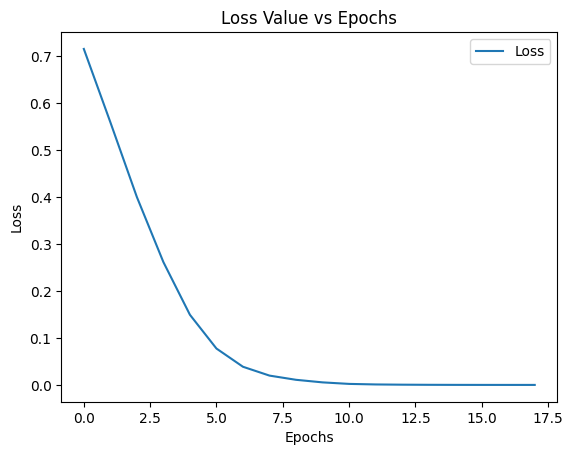

In [14]:
plt.plot(loss_values)
plt.title('Loss Value vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.show()